# Escola de Dados - Python para inovação cívica

Os dados que usaremos nesse notebook pode ser encontrado em: [TSE. Candidaturas em 2016 e 2020](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1).

Trabalharemos com os dados referentes as candidaturas nos estados de Pernambuco e Rio Grande do Norte.

------
Pontos para aula:

Quantas candidaturas houveram em cada ano agrupado por gênero ?  
Qual a faixa etária média das pessoas candidatas?  
Há correlação entre idade, gênero e custo da campanha?  
Visualização gráfica da distribuição da variável DS_COR_RACA em 2016

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [21]:
dados_pe_rn = glob.glob('base_dados/consulta*.csv')
print(dados_pe_rn)

['base_dados/consulta_cand_2016_PE.csv', 'base_dados/consulta_cand_2016_RN.csv', 'base_dados/consulta_cand_2020_PE.csv', 'base_dados/consulta_cand_2020_RN.csv']


In [22]:
lista_df = []

for dados_estado in dados_pe_rn:
    df_estado = pd.read_csv(dados_estado, sep=";", encoding='latin_1', na_values=['#NULO#'], low_memory=False) # o python pede esse low_memory...
    lista_df.append(df_estado)

In [23]:
lista_df[0].columns == lista_df[3].columns #saber se os nome de colunas tem a mesma estrutura com parando o tem 0 com o item 3 conforme a lista do df

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [24]:
df_completo = pd.concat(lista_df, axis=0, ignore_index=True)

In [25]:
df_completo.shape

(59991, 63)

In [26]:
df_completo.info() # verifica se há valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59991 entries, 0 to 59990
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     59991 non-null  object 
 1   HH_GERACAO                     59991 non-null  object 
 2   ANO_ELEICAO                    59991 non-null  int64  
 3   CD_TIPO_ELEICAO                59991 non-null  int64  
 4   NM_TIPO_ELEICAO                59991 non-null  object 
 5   NR_TURNO                       59991 non-null  int64  
 6   CD_ELEICAO                     59991 non-null  int64  
 7   DS_ELEICAO                     59991 non-null  object 
 8   DT_ELEICAO                     59991 non-null  object 
 9   TP_ABRANGENCIA                 59991 non-null  object 
 10  SG_UF                          59991 non-null  object 
 11  SG_UE                          59991 non-null  int64  
 12  NM_UE                          59991 non-null 

In [ ]:
# Quantas candidaturas houveram em cada ano agrupado por gênero ?

# Começar a responder as perguntas

In [27]:
df_completo['DS_CARGO'].unique() # valores unicos na coluna cargo

array(['VEREADOR', 'VICE-PREFEITO', 'PREFEITO'], dtype=object)

In [28]:
df_completo['DS_DETALHE_SITUACAO_CAND'].unique()

array(['DEFERIDO', 'RENÚNCIA', 'INDEFERIDO', 'DEFERIDO COM RECURSO',
       'INDEFERIDO COM RECURSO', 'NÃO CONHECIMENTO DO PEDIDO',
       'CANCELADO', 'FALECIDO', 'PENDENTE DE JULGAMENTO',
       'CASSADO COM RECURSO', 'CANCELADO COM RECURSO',
       'PEDIDO NÃO CONHECIDO', 'CASSADO'], dtype=object)

In [29]:
df_vereadores = df_completo[
    (df_completo['CD_CARGO'] == 13) & #and
    ((df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') | #or
    (df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO'))
].copy() #shallow copy

In [30]:
df_vereadores.shape #conferir resgistrso filtrados pelo numero que diminuiu

(52176, 63)

In [31]:
df_raca_genero = df_vereadores[['ANO_ELEICAO', 'CD_CARGO', 'SG_UF', 'NR_PARTIDO', 'SG_PARTIDO', 'CD_GENERO', 
                                'DS_GENERO', 'CD_COR_RACA', 'DS_COR_RACA', 'NR_IDADE_DATA_POSSE', 
                                'VR_DESPESA_MAX_CAMPANHA']].copy()

In [32]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
0,2016,13,PE,27,PSDC,4,FEMININO,3,PARDA,49.0,96474.36
1,2016,13,PE,22,PR,4,FEMININO,1,BRANCA,26.0,10803.91
2,2016,13,PE,15,PMDB,2,MASCULINO,3,PARDA,40.0,16678.93
3,2016,13,PE,27,PSDC,2,MASCULINO,1,BRANCA,39.0,21221.89
4,2016,13,PE,10,PRB,4,FEMININO,3,PARDA,36.0,10803.91


# Quantas candidaturas houveram em cada ano agrupado por gênero ? 

In [52]:
df_raca_genero[['ANO_ELEICAO', 'DS_GENERO', 'CD_CARGO']].groupby(by=['ANO_ELEICAO', 'DS_GENERO']).count()

CD_CARGO
ANO_ELEICAO DS_GENERO               
2016        FEMININO            7760
            MASCULINO          16622
            NÃO DIVULGÁVEL         1
2020        FEMININO            9398
            MASCULINO          18395

In [61]:
round(df_raca_genero[['DS_GENERO', 'VR_DESPESA_MAX_CAMPANHA']].groupby(by=['DS_GENERO']).mean(), 2) #para arredondar

,VR_DESPESA_MAX_CAMPANHA
DS_GENERO,
FEMININO,74018.08
MASCULINO,78522.27
NÃO DIVULGÁVEL,-4.00


<AxesSubplot:xlabel='ANO_ELEICAO,DS_GENERO'>

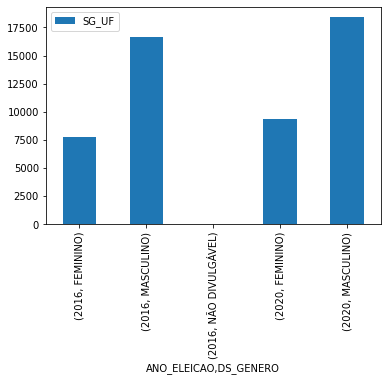

In [55]:
df_raca_genero[['ANO_ELEICAO', 'SG_UF','DS_GENERO']].groupby(by=['ANO_ELEICAO', 'DS_GENERO']).count().plot(kind='bar')

In [56]:
round(df_raca_genero[['DS_GENERO', 'VR_DESPESA_MAX_CAMPANHA']].groupby(by=['DS_GENERO']).mean(), 2)

,VR_DESPESA_MAX_CAMPANHA
DS_GENERO,
FEMININO,74018.08
MASCULINO,78522.27
NÃO DIVULGÁVEL,-4.00


# Qual a faixa etária média das pessoas candidatas?

In [57]:
df_raca_genero.head() # esse é o dataframe com idade mas sem faixa etária

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA,FAIXA_ETARIA
0,2016,13,PE,27,PSDC,4,FEMININO,3,PARDA,49.0,96474.36,45 a 54 anos
1,2016,13,PE,22,PR,4,FEMININO,1,BRANCA,26.0,10803.91,25 a 34 anos
2,2016,13,PE,15,PMDB,2,MASCULINO,3,PARDA,40.0,16678.93,35 a 44 anos
3,2016,13,PE,27,PSDC,2,MASCULINO,1,BRANCA,39.0,21221.89,35 a 44 anos
4,2016,13,PE,10,PRB,4,FEMININO,3,PARDA,36.0,10803.91,35 a 44 anos


In [37]:
df_raca_genero.describe() # ver min e max

,ANO_ELEICAO,CD_CARGO,NR_PARTIDO,CD_GENERO,CD_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
count,52176.000000,52176.0,52176.000000,52176.000000,52176.000000,52175.000000,5.217600e+04
mean,2018.130711,13.0,33.530186,2.657582,2.160610,43.680824,7.703957e+04
std,1.995743,0.0,21.004875,0.940046,0.992971,12.088887,1.755014e+05
min,2016.000000,13.0,10.000000,-4.000000,-4.000000,18.000000,-4.000000e+00
25%,2016.000000,13.0,15.000000,2.000000,1.000000,35.000000,1.230775e+04
50%,2020.000000,13.0,25.000000,2.000000,3.000000,43.000000,2.292882e+04
75%,2020.000000,13.0,45.000000,4.000000,3.000000,51.000000,4.662495e+04
max,2020.000000,13.0,90.000000,4.000000,6.000000,999.000000,1.011150e+06


In [62]:
cortes = [18, 25, 35, 45, 55, 65, 100]
categorias = ['18 a 24 anos', '25 a 34 anos', '35 a 44 anos', '45 a 54 anos', '55 a 64 anos', 'acima de 64 anos']

In [66]:
df_raca_genero['FAIXA_ETARIA'] = pd.cut(df_raca_genero['NR_IDADE_DATA_POSSE'], cortes, labels=categorias, include_lowest=True) # ultima variavel inclui o 18

In [67]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA,FAIXA_ETARIA
0,2016,13,PE,27,PSDC,4,FEMININO,3,PARDA,49.0,96474.36,45 a 54 anos
1,2016,13,PE,22,PR,4,FEMININO,1,BRANCA,26.0,10803.91,25 a 34 anos
2,2016,13,PE,15,PMDB,2,MASCULINO,3,PARDA,40.0,16678.93,35 a 44 anos
3,2016,13,PE,27,PSDC,2,MASCULINO,1,BRANCA,39.0,21221.89,35 a 44 anos
4,2016,13,PE,10,PRB,4,FEMININO,3,PARDA,36.0,10803.91,35 a 44 anos


In [65]:
df_raca_genero['FAIXA_ETARIA'].mode() # considerando a moda pois é a faixa etária que mais se repete

0    35 a 44 anos
Name: FAIXA_ETARIA, dtype: category
Categories (6, object): ['18 a 24 anos' < '25 a 34 anos' < '35 a 44 anos' < '45 a 54 anos' < '55 a 64 anos' < 'acima de 64 anos']

# Visualize graficamente a distribuição da variável DS_COR_RACA em 2016

In [70]:
df_raca_2016 = df_raca_genero[df_raca_genero['ANO_ELEICAO'] == 2016].copy()

In [72]:
df_raca_2016[['CD_COR_RACA', 'DS_COR_RACA']].groupby(['DS_COR_RACA']).count()

,CD_COR_RACA
DS_COR_RACA,
AMARELA,132
BRANCA,9956
INDÍGENA,89
NÃO DIVULGÁVEL,1
PARDA,12156
PRETA,2049


In [73]:
raca = df_raca_2016['DS_COR_RACA'].unique().tolist() # valores unicos de uma coluna e export para lista
print(raca)

['PARDA', 'BRANCA', 'PRETA', 'INDÍGENA', 'AMARELA', 'NÃO DIVULGÁVEL']


In [74]:
frequencia = df_raca_2016['DS_COR_RACA'].value_counts().tolist()
print(frequencia)

[12156, 9956, 2049, 132, 89, 1]


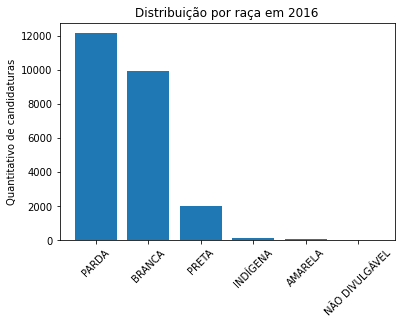

In [75]:
plt.bar(raca, frequencia)

plt.xticks(rotation=45) 
plt.title('Distribuição por raça em 2016')
plt.ylabel('Quantitativo de candidaturas')
#plt.show() # necessário para terminal (fora do Jupyter, que já plota o grafico)
plt.savefig('test.pdf')

# Há correlação entre idade, gênero e custo da campanha?

In [76]:
df_raca_genero[['NR_IDADE_DATA_POSSE', 'CD_GENERO', 'VR_DESPESA_MAX_CAMPANHA']].corr(method='pearson')

,NR_IDADE_DATA_POSSE,CD_GENERO,VR_DESPESA_MAX_CAMPANHA
NR_IDADE_DATA_POSSE,1.000000,-0.056293,0.072223
CD_GENERO,-0.056293,1.000000,-0.011992
VR_DESPESA_MAX_CAMPANHA,0.072223,-0.011992,1.000000


linha diagonal = 1, "Mesmo numero mudando pro mesmo lado na mesma proporção"

Teste de hipótese: eu achoq ue a idade possivelmente esta relacionado ao valor max de campanha = hipotse nula
Queremos confirmar ou não essa hipótese, mas os valores são muito baixas